In [3]:
import os
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from SimPEG import Mesh


simpegskytem_path = '../../kang-2019-3D-aem/codes'


# outputdir = Path('.')
outputdir = Path('/scratch/users/ianpg/SWIlarge/work/output')

#Local imports and file creation
if not simpegskytem_path in sys.path:
    sys.path.append(simpegskytem_path)

import simpegskytem
from simpegskytem import ProblemSkyTEM, GlobalAEMSurveyTD, GlobalSkyTEM, get_skytem_survey,Utils


def load_obj(dirname,name):
    import pickle
    with open(Path(dirname).joinpath(name + '.pkl').as_posix(), 'rb') as f:
        return pickle.load(f)


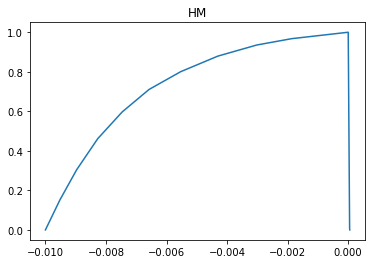

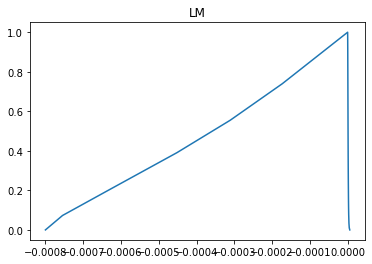

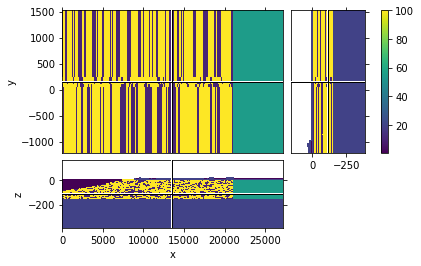

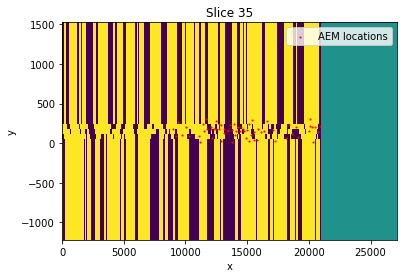

In [4]:
mesh = load_obj(outputdir,'mesh')
survey = load_obj(outputdir,'survey')
simulation = load_obj(outputdir,'simulation')
rho_grid = load_obj(outputdir,'rho_grid')
actv = load_obj(outputdir,'actv')




plt.figure()
plt.plot(survey.time_input_currents[0],survey.input_currents[0])
plt.title("HM")
plt.figure()
plt.plot(survey.time_input_currents_dual_moment[0],survey.input_currents_dual_moment[0])
plt.title("LM")



mesh.plot_3d_slicer(rho_grid)
plt.show()

f,ax = plt.subplots(1)

mesh.plotSlice(rho_grid,grid=False,ax=ax)
plt.scatter(survey.src_locations[:,0],survey.src_locations[:,1],s=1,c='r',label='AEM locations')
plt.legend()


In [5]:
test_HM = np.array([3.485200e-05, 4.186200e-05, 5.085200e-05, 6.235200e-05,
       7.685200e-05, 9.485200e-05, 1.173420e-04, 1.453420e-04,
       1.808420e-04, 2.263420e-04, 2.833420e-04, 3.553420e-04,
       4.463420e-04, 5.603420e-04, 7.043420e-04, 8.858420e-04,
       1.114642e-03, 1.402642e-03, 1.766642e-03, 2.225642e-03,
       2.803642e-03, 3.522642e-03, 4.402642e-03, 5.479642e-03,
       6.797642e-03, 8.411642e-03])
test_LM = np.array([2.0720e-05, 2.7730e-05, 3.6720e-05, 4.8220e-05, 6.2720e-05,
       8.0720e-05, 1.0321e-04, 1.3121e-04, 1.6671e-04, 2.1221e-04,
       2.6921e-04, 3.4121e-04, 4.3221e-04, 5.4621e-04, 6.9021e-04,
       8.7171e-04])

In [6]:
print('writing inputs...\n')
simulation.write_inputs_on_disk_pool()
print('running simulation...\n')
data = simulation.forward(1./rho_grid)
print('finished simulation!')
# DATA = data.reshape((times_hm_312.size+times_lm_312.size, n_sounding), order='F')
# DATA_HM = -DATA[:times_hm_312.size,:]
# DATA_LM = -DATA[times_hm_312.size:,:]


writing inputs...

running simulation...

finished simulation!


In [12]:
DATA = data.reshape((survey.time[0].size+survey.time_dual_moment[0].size, survey.n_sounding), order='F')
DATA_HM = -DATA[:survey.time[0].size,:]
DATA_LM = -DATA[survey.time[0].size:,:]


In [16]:
DATA_HM.shape

(26, 65)

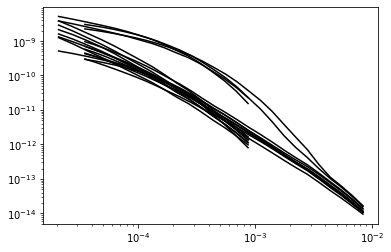

In [18]:
t_hm = survey.time[0]
t_lm = survey.time_dual_moment[0]

plt.loglog(t_hm,DATA_HM[:,:10],'k')
plt.loglog(t_lm,DATA_LM[:,:10],'k')